<code>years_em</code> fueron completados con ceros

<code>years_demency</code> fueron completados con ceros

<code>tecar</code> reasignado con binario

<code>lateralidad</code> reasignado con binario: 1:diestro

<code>genero</code> reasignado con binario: 1:M 0:H

<code>tipico</code>, <code>tipico</code> y <code>deposito</code> han sido completadas con ceros en las casillas vacías (Entre los existentes ninguno tiene valor cero)

Paciente 10: variable <code>posee_dii</code> vacío. Se ha puesto 'NO'

Paciente 25: variables <code>forst_iden</code>,	<code>fcsrt_free_recall_score</code>,	<code>fcsrt_cued_recall_score</code> y	<code>fcsrt_total_recall_score</code> vacías. Se ha puesto 0


Variables han sido reescritas en minúscula y separadas con _


In [1]:
# Imports needed for the script
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
data_non = pd.read_csv("qvalues_pvalues_tests.csv", sep = ',') 

names = data_non.columns
#data_non.columns = [''] * len(data_non.columns)
data_non.shape
names

Index(['general_structure', 'sub_structure', 'hc_q1', 'hc_q2', 'hc_q3',
       'en_q1', 'en_q2', 'en_q3', 'ed_q1', 'ed_q2', 'ed_q3',
       'kruskal_wallis_hc_vs_en_ed_pvalue', 'mann_whitney_hc_vs_en_pvalue',
       'mann_whitney_hc_vs_ed_pvalue', 'mann_whitney_en_vs_ed_pvalue'],
      dtype='object')

In [3]:
data_non = data_non.fillna(0)

In [4]:
general_structures = data_non['general_structure'].drop_duplicates()
general_structures.values

array(['white_matter_segmentation', 'ventricles', 'thalamus',
       'segmentation', 'general_segmentation', 'hippocampus',
       'gray_matter_segmentation', 'cingulate', 'basal_ganglia',
       'amygdala'], dtype=object)

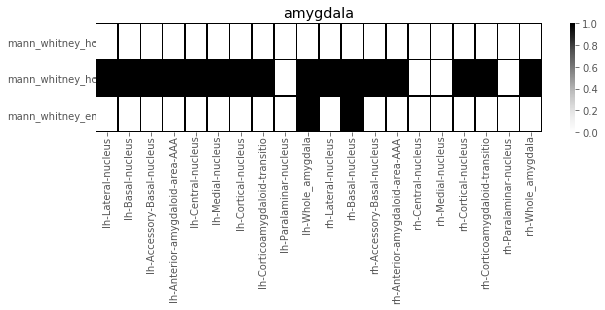

In [67]:
column_names = ['mann_whitney_hc_vs_en_pvalue','mann_whitney_hc_vs_ed_pvalue','mann_whitney_en_vs_ed_pvalue']

#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#fig, axes = plt.subplots(10,1, figsize = (5,50))
m=0
#fig.subplots_adjust(hspace=1)
plt.figure(1, figsize=(10, 2))
general_structures = [       'amygdala']
for general_structure in general_structures:
    general_structure_data = data_non[(data_non['general_structure']==general_structure)]
    substructure_names = general_structure_data['sub_structure']
    general_structure_data_mann_whitney = general_structure_data[column_names]
    
    general_structure_data_mann_whitney_thresh = (general_structure_data_mann_whitney <= 0.05).astype(int)
    
    
    
    

    #Constructs the heatmap
    axf1 = sb.heatmap(
        np.transpose(general_structure_data_mann_whitney_thresh.values), 
        cmap='Greys',
        linewidth=0.5,
        linecolor = "black",
        #ax = axes[m],
    )
    
    axf1.set_yticklabels(
                column_names,
                rotation=0,
                horizontalalignment='center',
            );
    plt.xticks(np.arange(len(substructure_names))+0.5, substructure_names, rotation=90)
    axf1.tick_params(axis ='x', pad = 0.)
    
    axf1.set_title(general_structure)
    
    axf1.figure.savefig(general_structure+'.pdf', bbox_inches='tight')
            
    del axf1        
            
            
            
          
    